# Predicting Heart Disease Using Machine Learning

This Notebook looks into various  Python-based machine leanring and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition 

In a statement,
>Given Clinical parameters about a patient ,can we predict whether or nor they have a heart disease

## 2. Data

The original data came from teh Cleveland data from the UCI Machine learning reposistory.
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If the Machine Learning model can reach 95% accuracy at predicting whether the patient has heart disease or not during the proof of concept, we will pursue the project

## 4. Features

This is where you will get different information about each feature of our data

**Create data dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)- have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools 

We're going to use Pandas, Matplotlib and Numpy for data analysis and manipulation

In [142]:
# Importing all the tools we need

# Regular EDA (Exploratort data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Modules from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

## Load the data

In [20]:
df= pd.read_csv("heart-disease.csv")
df.shape
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (Exploratory Data Analysis)

The goal here is to find more about the data and become a subject matter expert on the dataset

1. What question(s) are you tryong to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Lets find out how many each class is there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

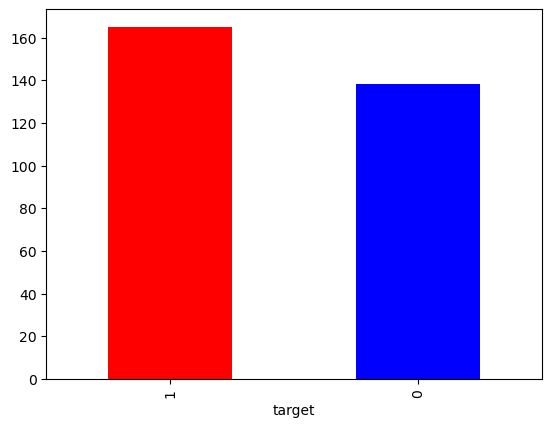

In [23]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"]);

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [27]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [28]:
# Compare target to sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


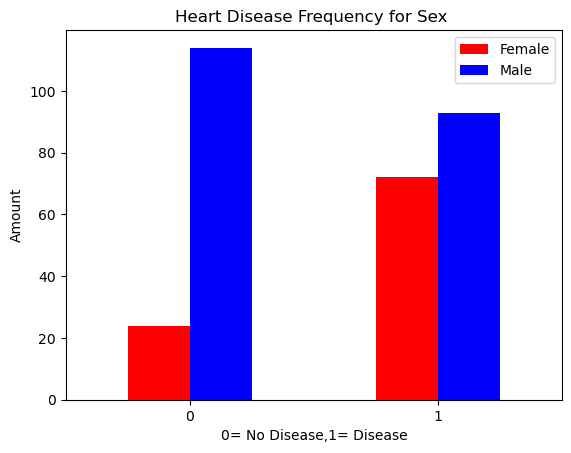

In [29]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["red","blue"]);
plt.title ("Heart Disease Frequency for Sex ")
plt.xlabel("0= No Disease,1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Age vs Thalach for Heart Disease

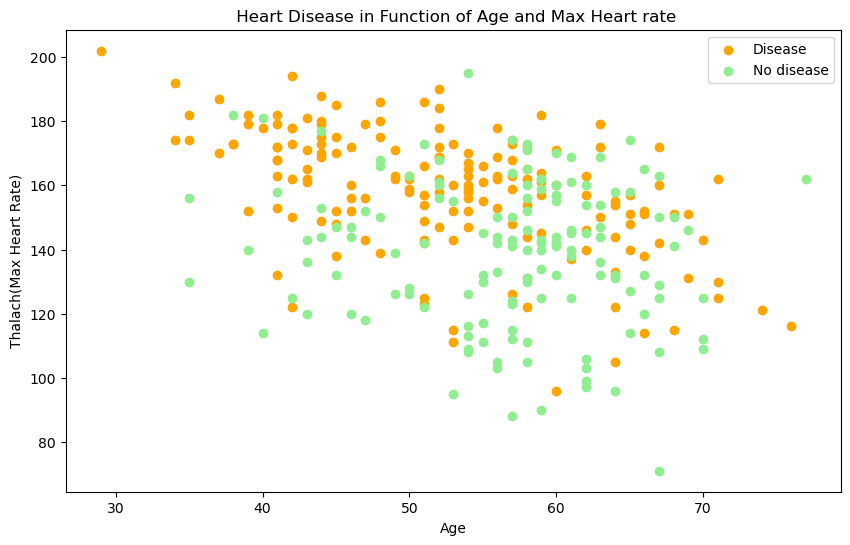

In [30]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="orange");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightgreen");

# Info
plt.title(" Heart Disease in Function of Age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Thalach(Max Heart Rate)")
plt.legend(["Disease", "No disease"]);

(<Axes: ylabel='Frequency'>,)

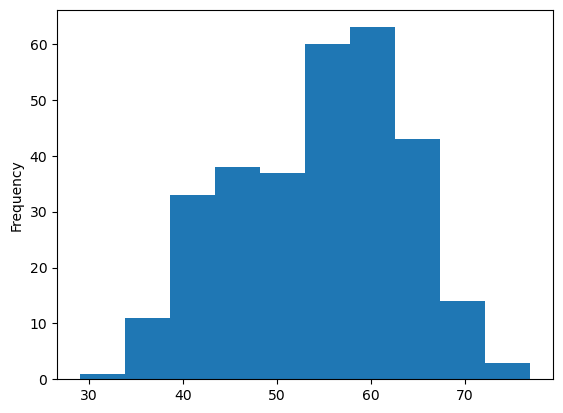

In [31]:
# Check the distribution of the Age in a histogram
df.age.plot.hist(),

### Heart Disease frequency per Chest pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [32]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


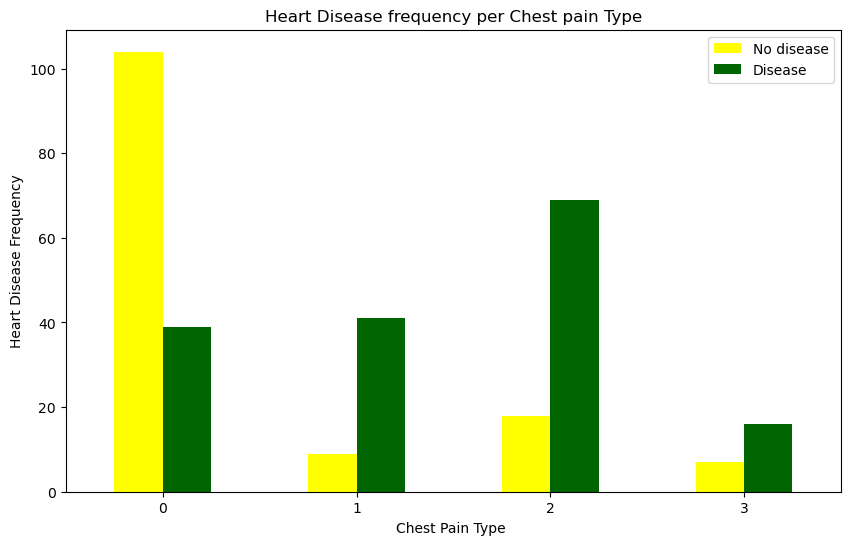

In [43]:
# More visual crosstab
pd.crosstab(df.cp,df.target).plot(kind= "bar",
                                  figsize=(10,6),
                                  color=["yellow", "darkgreen"])
plt.xlabel ("Chest Pain Type ")
plt.ylabel("Heart Disease Frequency")
plt.title("Heart Disease frequency per Chest pain Type")
plt.legend(["No disease","Disease"]);
plt.xticks(rotation=0);

In [45]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


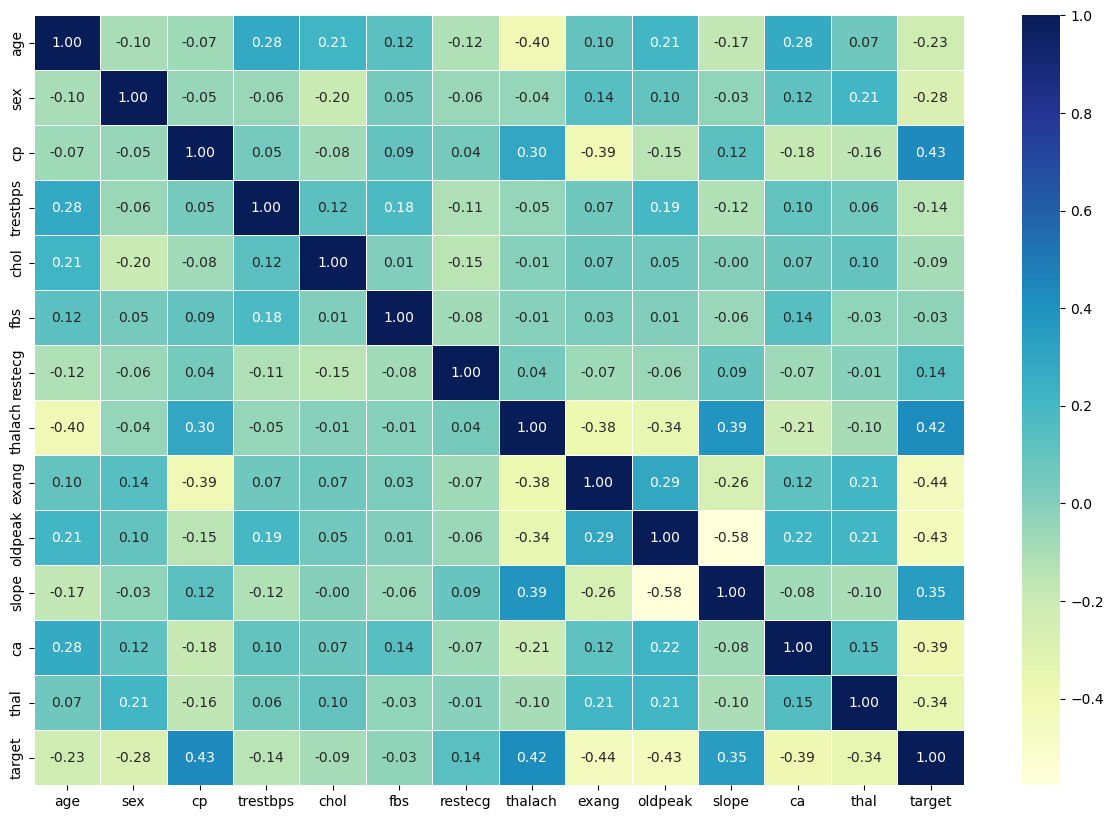

In [48]:
# More visual Correlation Matrix
corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu")

## 5. Modelling

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We will using three different models
* RandomForestClassifier()
* KNearestNeighbors()
* LogisticRegression()

In [51]:
# Setup random seed
np.random.seed(42)

# Split data in to X and Y
x=df.drop("target",axis=1)
y=df["target"]

# Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the model
model=RandomForestClassifier()

# Fit our model
model.fit(x_train,y_train)

# Score our model
model.score(x_test,y_test)

0.8524590163934426

In [52]:
# Setup random seed
np.random.seed(42)

# Split data in to X and Y
x=df.drop("target",axis=1)
y=df["target"]

# Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the model
model=KNeighborsClassifier()

# Fit our model
model.fit(x_train,y_train)

# Score our model
model.score(x_test,y_test)

0.6885245901639344

In [64]:
# Setup random seed
np.random.seed(42)

# Split data in to X and Y
x=df.drop("target",axis=1)
y=df["target"]

# Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the model
model=LogisticRegression()

# Fit our model
model.fit(x_train,y_train)

# Score our model
model.score(x_test,y_test)

C:\Users\lenovo\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [69]:
models= {"Logistic": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "RFC":RandomForestClassifier()}

def fit_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    models_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        models_scores[name]=model.score(x_test,y_test)
    return models_scores

In [70]:
model_score=fit_score(models,x_train,x_test,y_train,y_test)
model_score

C:\Users\lenovo\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RFC': 0.8360655737704918}

### Model Comaprison

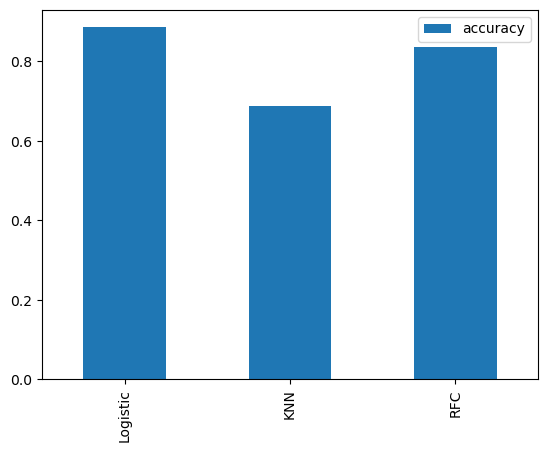

In [72]:
model_compare=pd.DataFrame(model_score,index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we have our model's first predictions but the first predictions are not always what we base or next step off
What to do?

Lets look at the following:
* Hyperparameter tuning
* Feature Importantce
* Confusin Matrix
* Cross Validation
* Precison
* Recall
* F1 Score
* Classification Report
* Area under the curve (AUC)
* ROC Curve

### Hyperparameter Tuning

In [73]:
# Lets tune KNN

train_scores=[]
test_scores=[]

# Create a list of different values for n Neighbors
neighbors=range(1,21)

# Setup KNN
knn= KNeighborsClassifier()

# Loop Thriugh different N-Neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit our model
    knn.fit(x_train,y_train)

    # Udpate the training scores list
    train_scores.append(knn.score(x_train,y_train))

    # Update the test scores list
    test_scores.append(knn.score(x_test,y_test))


In [74]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [76]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximun KNN Score on the test set:75.41%


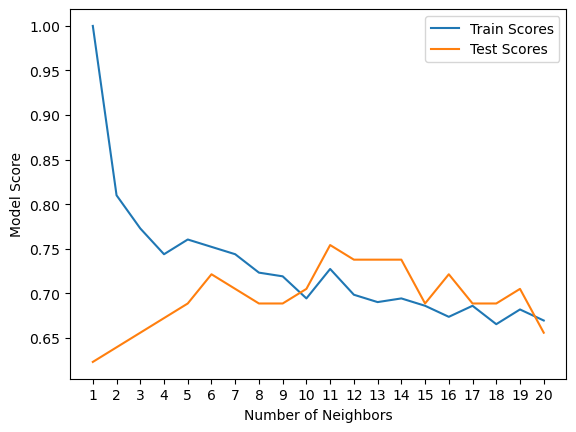

In [79]:
# Lets see more visually
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximun KNN Score on the test set:{max(test_scores)*100:.2f}%")

#### Tuning LogisticRegression and RandomForestClassifier using RandomizedSearchCV


In [87]:
# Create a hyperparameter grid for LogisticRegression 
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# Create a hyperpparamter grid for RandomForestClassifier
rf_grid= {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

Now we have hyperparameter grids for both of our models, 

Lets tune them using RandomizedSearchCV

In [88]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparamter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

# Fit random hyperparamter search model for LogisticRegression 
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [89]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [90]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we tuned Logistic Regression , Lets do the same for RandomForestClassifier

In [91]:
# Setup random search
np.random.seed(42)

# Setup RandomizedSearchCV for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
# Fit the model
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [92]:
# Best Hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [93]:
# Score the model
rs_rf.score(x_test,y_test)

0.8688524590163934

In [94]:
model_score

{'Logistic': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RFC': 0.8360655737704918}

Logistic Regression is still the most accurate model so we will try to imporve it using GridSearchCV

#### Tuning LogisticRegression using GridSearchCV

In [96]:
# Different hyperparamters for our LogisticRegression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

# Setup Grid Hyperparameters search for LogisticRegression
gs_log_reg= GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [97]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [98]:
# Evaluate the model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [99]:
model_score

{'Logistic': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RFC': 0.8360655737704918}

## Evaluation our model beyound Accuracy:

* ROC Curve and AUC Curve
* Confusion Matrix
* Classification Repory
* Precison
* Recall
* F1 score


... and use Cross Validation wherever possible

To make comparisons and evaluate our trained model, we need to make preictions.

In [100]:
# Make predicts
y_preds=gs_log_reg.predict(x_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

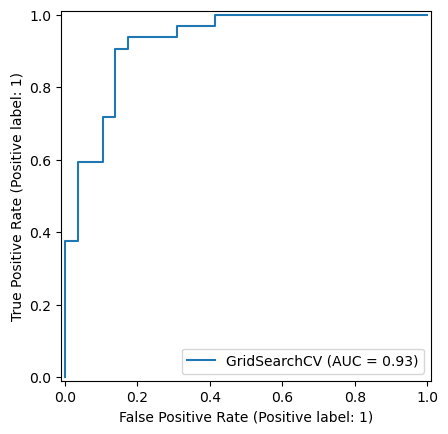

In [107]:
# Plot ROC curve and calculate the AUC Metric
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test);

In [108]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


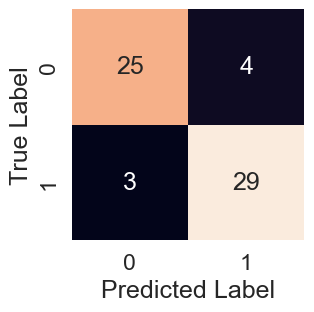

In [110]:
# More Visualized using Seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a Confusion Matrix using Seaborn's Heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test,y_preds)

Now we have got a ROC Curve and Auc metric and confusion matrix. Lets get a Classificiation Report as well as cross-validated precison,recall and f1 score.

In [111]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Evaluation using Cross_Validation

We are going to calculate precison, recall and f1 score using cross validaion, using `cross_val_score`

In [112]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [113]:
# Create a new classifier with the best params
clf= LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [121]:
# Cross Validated accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [123]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [126]:
# Cross validated precison
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [127]:
# Cross validated recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [130]:
# Cross Validated F1 
cv_f1score=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1score=np.mean(cv_f1score)
cv_f1score

0.8673007976269721

<Axes: title={'center': 'Cross_validated Evaluation Metrics'}>

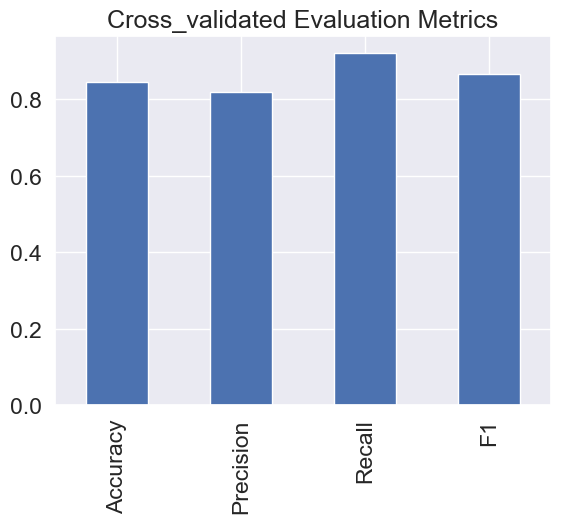

In [131]:
#  Visualize our cross_evaluated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1":cv_f1score},index=[0])
cv_metrics.T.plot.bar(title="Cross_validated Evaluation Metrics",legend=False)

### Feature Importance

Feature Importance is another way of asking "which features contributed most of the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for (MODEL NAME)feature importance

Lets find the feature importance of our LogisticRegression Model...

In [133]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [136]:
gs_log_reg.best_params_

clf=LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [137]:
# Check Coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [155]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

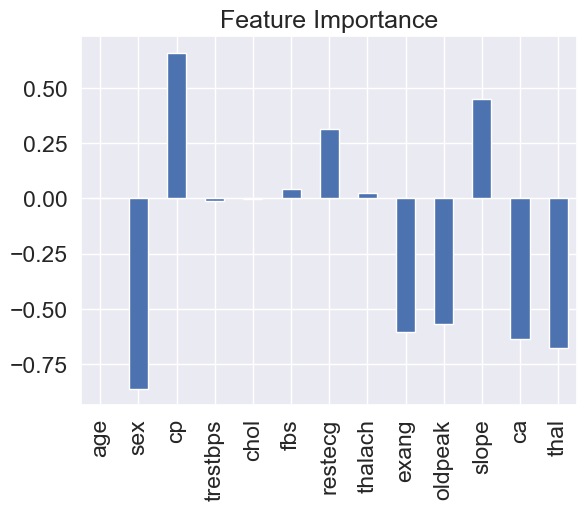

In [158]:
# Visualize Feature Importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [159]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [161]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimention

We havent't hit our evaluation metric yet:

* Could we collect more data
* Could we try a better model? Like CatBoost or XGBoost?
* Could we improve the current model? (beyond what we have done so far)

If the model is good enough (we have hit oyr evaluation metric) how would we export it and share it with others